Pertama kita mengimport libray yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Dataset yang akan digunakan adalah dataset spesifikasi smartphone. Dalam klasterisasi ini diharapkan hasil berupa klasterisasi smartphone yakni fitur-fitur yang terdapat dalam smartphone tersebut seperti klaster low-end, mid-end dsb

In [3]:
df = pd.read_csv('./drive/MyDrive/Kaggle/phone.csv')

In [4]:
df.drop(['price_range'], axis=1, inplace=True)

Pada cell diatas, kita menghapus kolom yang tidak digunakan

In [5]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


Langkah selanjutnya adalah melakukan normalisasi pada data numerik. Hal ini berguna agar range nilai yang akan ditrain menjadi lebih kecil. Hal ini juga untuk mengatasi adanya nilai yang terlalu tinggi yang dapat memengaruhi hasil klasterisasi

In [7]:
from sklearn.preprocessing import MinMaxScaler

df_scale = df.copy()

scaler = MinMaxScaler()

df_scale = scaler.fit_transform(df_scale)


In [8]:
df_scale = pd.DataFrame(df_scale)
df_scale.columns = df.columns

data_cluster = df_scale.copy()

## Pengklasteran K rata-rata


Untuk menggunakan metode K-Means, kita perlu menentukan jumlah klaster yang akan digunakan. Sebagai patokan, kita akan menggunakan metode elbow untuk mengestimasi jumlah klaster optimal dari dataset yang ada

Text(0, 0.5, 'Inertia')

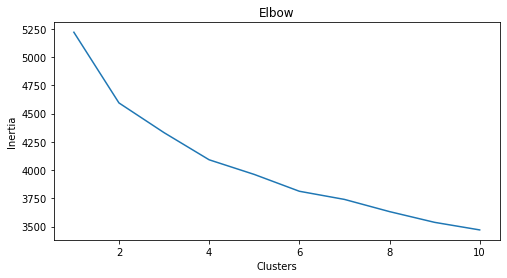

In [9]:
from sklearn.cluster import KMeans

clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(df_scale)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Dari hasil metode elbow diatas, kita dapat menentukan bahwa nilai optimal klaster berada disekitaran 4 klaster

In [10]:
model_kmeans = KMeans(n_clusters=4)

model_kmeans.fit(df_scale)

data_cluster['klaster k-means'] = model_kmeans.labels_

data_cluster

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,klaster k-means
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,1
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,1
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0,1
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0,3
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0,1
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0,2


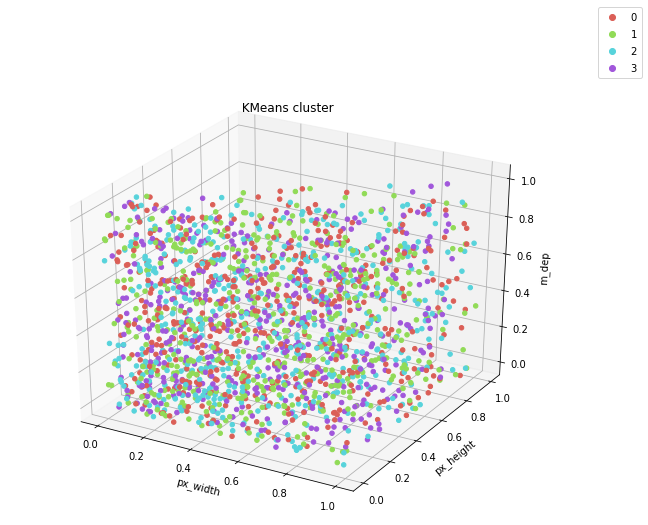

In [11]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')

cmap = ListedColormap(sns.color_palette("hls", 4).as_hex())

scatter = ax.scatter(data_cluster['px_width'],data_cluster['px_height'], data_cluster['m_dep'],
                     c=data_cluster['klaster k-means'],s=20, cmap=cmap, alpha=1)

ax.set_xlabel("px_width")
ax.set_ylabel("px_height")
ax.set_zlabel("m_dep")
plt.title(' KMeans cluster')
plt.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=3)

plt.show()

Dari visualisasi diatas, terlihat bahwa persebaran klusternya tidak merata. Hal ini wajar sebab terdapat keterbatasan dalam memvisualisasikan dimana dataset yang ditrain memiliki 20 atribut sedangkan visualisasi hanya dapat diimplementasikan maksimal pada 3 dimensi. Umumnya dilakukan reduksi dimensi seperti PCA agar hasil yang divisualisasikan lebih optimal, namun hal tersebut tidak akan dilakukan disini

## Pengklasteran K-Medoids

In [12]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

In [13]:
model_kmedoids = KMedoids(n_clusters=4,method="pam")

model_kmedoids.fit(df_scale)

data_cluster['klaster k-medoids'] = model_kmedoids.labels_

data_cluster

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,klaster k-means,klaster k-medoids
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,0,1
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,1,0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,1,0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,0,2
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0,1,0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0,3,2
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0,1,3
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0,2,3


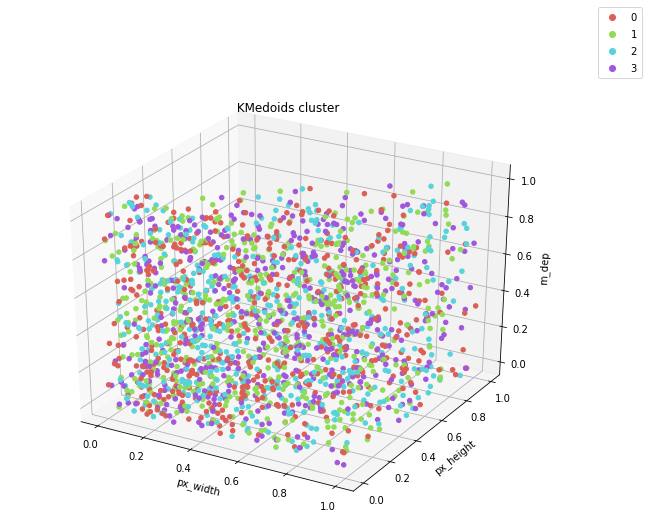

In [14]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')

cmap = ListedColormap(sns.color_palette("hls", 4).as_hex())

scatter = ax.scatter(data_cluster['px_width'],data_cluster['px_height'], data_cluster['m_dep'],
                     c=data_cluster['klaster k-medoids'],s=20, cmap=cmap, alpha=1)

ax.set_xlabel("px_width")
ax.set_ylabel("px_height")
ax.set_zlabel("m_dep")
plt.title(' KMedoids cluster')
plt.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=3)

plt.show()

## Pengklasteran Hirarki

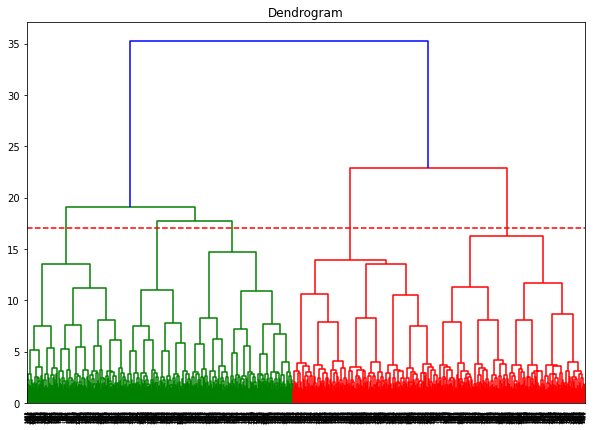

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = dendrogram(linkage(df_scale, method="ward"))
plt.axhline(y=17, color='r', linestyle='--')

In [21]:
from sklearn.cluster import AgglomerativeClustering

model_agglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model_agglo.fit_predict(df_scale)

data_cluster['klaster agglomerative'] = model_agglo.labels_

data_cluster

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,klaster k-means,klaster k-medoids,klaster agglomerative
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,0,1,0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,1,0,1
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,1,0,1
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,0,2,0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0,1,0,1
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0,3,2,3
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0,1,3,2
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0,2,3,2


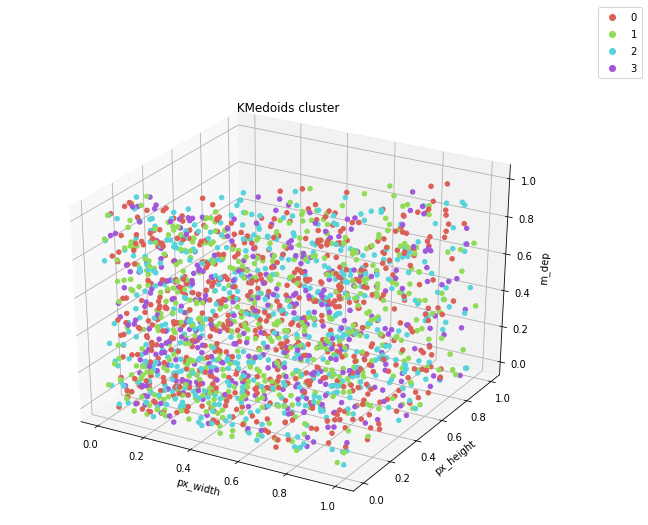

In [22]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')

cmap = ListedColormap(sns.color_palette("hls", 4).as_hex())

scatter = ax.scatter(data_cluster['px_width'],data_cluster['px_height'], data_cluster['m_dep'],
                     c=model_agglo.labels_,s=20, cmap=cmap, alpha=1)

ax.set_xlabel("px_width")
ax.set_ylabel("px_height")
ax.set_zlabel("m_dep")
plt.title(' KMedoids cluster')
plt.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=3)

plt.show()


## Pengklasteran DBSCAN

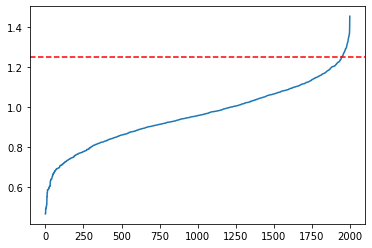

In [18]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=25)
nbrs = neigh.fit(df_scale)
distances, indices = nbrs.kneighbors(df_scale)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y=1.25, color='r', linestyle='--')

Pada pengklasteran DBSCAN, akan digunakan nilai epsilon sebesar 1.2 dan min_sample sebesar 25. Referensinya dapat diperoleh dari tautan berikut https://www.analyticsvidhya.com/blog/2021/06/understand-the-dbscan-clustering-algorithm/

In [24]:
from sklearn.cluster import DBSCAN

model_dbscan = DBSCAN(eps=1.2, min_samples=25)
model_dbscan.fit(df_scale)

data_cluster['klaster DBSCAN'] = model_dbscan.labels_

data_cluster

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,klaster k-means,klaster k-medoids,klaster agglomerative,klaster DBSCAN
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,0,1,0,-1
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,1,0,1,5
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,1,0,1,5
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,0,2,0,-1
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,2,2,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0,1,0,1,-1
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0,3,2,3,-1
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0,1,3,2,-1
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0,2,3,2,-1


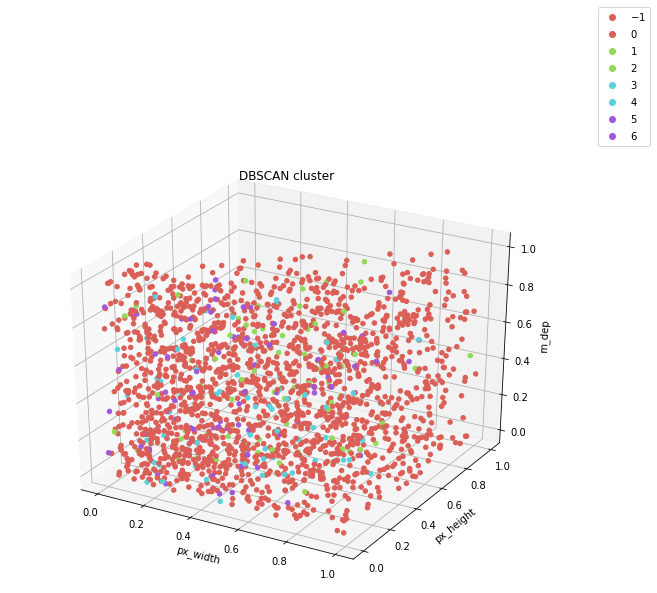

In [25]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')

cmap = ListedColormap(sns.color_palette("hls", 4).as_hex())

scatter = ax.scatter(data_cluster['px_width'],data_cluster['px_height'], data_cluster['m_dep'],
                     c=model_dbscan.labels_,s=20, cmap=cmap, alpha=1)

ax.set_xlabel("px_width")
ax.set_ylabel("px_height")
ax.set_zlabel("m_dep")
plt.title('DBSCAN cluster')
plt.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=3)

plt.show()

Dapat dilihat bahwa hasil pengklasteran dengan DBSCAN ini menghasilkan sebanyak 7 klaster dan sisanya adalah noise. Hal ini cukup berbeda dengan menggunakan metode distance seperti k-means dan hierarchial. Hasil yang diperoleh dari DBSCAN ini sangat dipengaruhi oleh parameter epsilon dan min_sample. Pada contoh diatas, digunakan nilai epsilon 1.25 yang berasal dari perhitungan nearest neighbour setiap data point, sedangkan nilai minPts yang digunakan berdasarkan teori minPts >= dim + 1